In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import csv
from tqdm import tqdm
import multiprocessing
from functools import partial
from PIL import Image

def get_files(folder):
    return [os.path.join(folder, f) for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

def get_folders(folder):
    return [os.path.join(folder, f) for f in os.listdir(folder) if os.path.isdir(os.path.join(folder, f))]

In [5]:
from os.path import join

ds_folder = '/home/ysheng/Dataset/human_ds/'
cache_folder = join(ds_folder, 'cache/shadow_output')
obj_list = get_folders(cache_folder)
print('there are {} files'.format(len(obj_list)))

there are 5 files


In [7]:
from sketch import sketch

In [10]:
def show(img):
    plt.figure(figsize=(15,10))
    plt.imshow(img)
    plt.show()

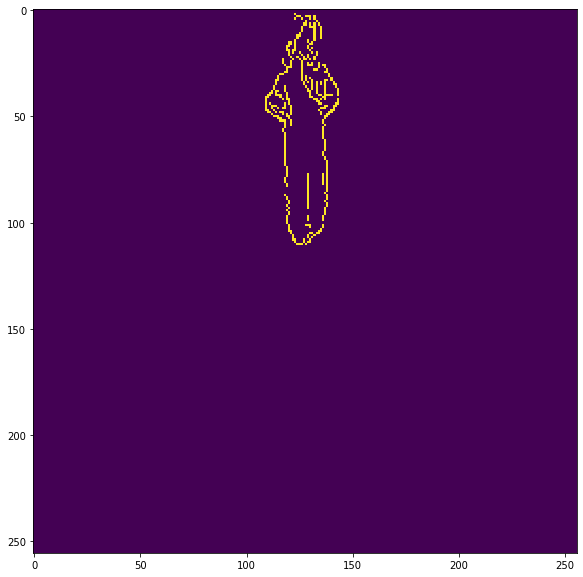

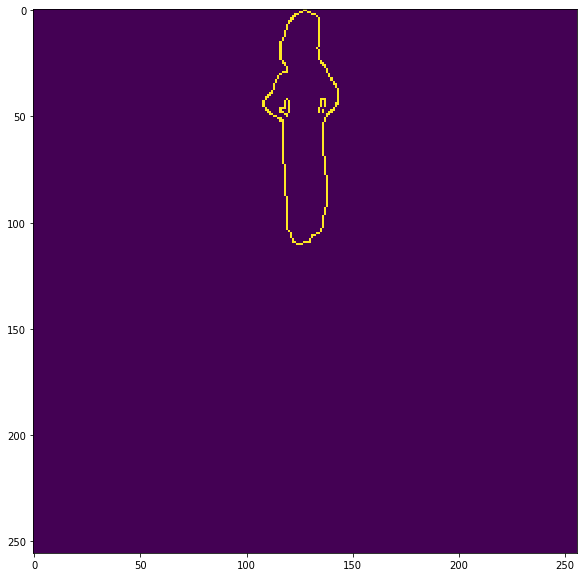

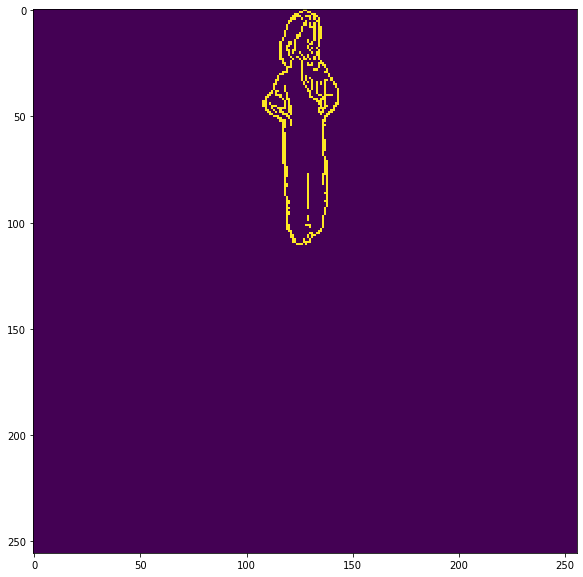

In [78]:
test_depth = '/home/ysheng/Dataset/human_ds/cache/shadow_output/combine_female_genesis3_basic_claudia_duchess_Fashion_Model_Pose_01/pitch_0_rot_0_fov_90_depth.png'
test_normal = '/home/ysheng/Dataset/human_ds/cache/shadow_output/combine_female_genesis3_basic_claudia_duchess_Fashion_Model_Pose_01/pitch_0_rot_0_fov_90_normal.png'

import cv2

def sketch(normal, depth):
    normal_img, depth_img = cv2.imread(normal), cv2.imread(depth)
#     normal_img = (normal_img * 255.0).astype(np.uint8)
#     depth_img = (depth_img * 255.0).astype(np.uint8)
#     print(np.max(normal_img), np.max(depth_img))
    
    normal_edge = cv2.Canny(normal_img, 600, 1000)
    depth_edge = cv2.Canny(depth_img, 0, 10)
#     alpha = 0.3
#     merged_edge = normal_edge * (1.0-alpha) + depth_edge * alpha
    merged_edge = np.logical_or(normal_edge, depth_edge)
    return normal_edge, depth_edge, merged_edge


normal_edge, depth_edge, merged_edge = sketch(test_normal, test_depth)

show(normal_edge)
show(depth_edge)
show(merged_edge)